# Ants Vs Bees(transfer learning)
PyTorch tutorial

## prepare dataset

In [ ]:
import os
import urllib.request
import zipfile

data_dir = "./data"

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
save_path = os.path.join(data_dir, "hymenoptera_data.zip")

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path) #get zip file
    zip = zipfile.ZipFile(save_path) # load zip file
    zip.extractall(data_dir) #unzip the file
    zip.close()
    os.remove(save_path)


## Define the ImageTransform class (preprocess the data)

In [15]:
class ImageTransfrom():
    """
    data_trasform(dic):
        train: transform object for training
        val  : transform object for validation
    """

    def __init__(self, resize, mean, std):
        """
        resize(int): size of image after risizing
        mean       : mean value of (R,G,B)
        std        : standard deviation of (R,G,B)
        """

        self.data_transform = {
            "train": transforms.Compose([
                transforms.RandomResizedCrop(
                    resize,
                    scale=(0.5, 1.0)
                ),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),

            "val": transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }

    def __call__(self, img, phase="train"):
        """
        phase: train or val
        """
        return self.data_transform[phase](img)

## Check images

original image


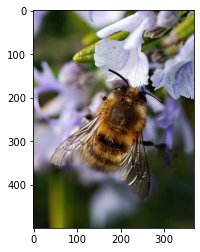

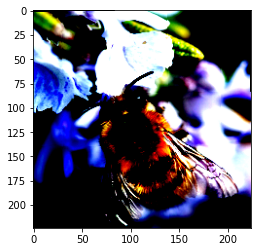

In [17]:
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

image_file_path = "./data/hymenoptera_data/train/bees/2405441001_b06c36fa72.jpg"
img = Image.open(image_file_path)

print("original image")
plt.imshow(img)
plt.show()

SIZE = 224
MEAN = (0.485, 0.456, 0.406)
STD = (0.229, 0.224, 0.255)

"""make transformer object"""
transform = ImageTransfrom(SIZE,MEAN,STD)
img_transformed = transform(img, phase="train")

"""(color, height, width) -> (height, width, color)"""
img_transformed = img_transformed.numpy().transpose((1,2,0))

""" 0 <= pixel <=1 """
img_transformed = np.clip(img_transformed, 0, 1)

plt.imshow(img_transformed)
plt.show()
